# Setup

In [8]:
from Plotting.Spectrogram import plot_spectrogram_on_axis
from SigMFSampleSequence import load_sigmf_sequence
from matplotlib import pyplot as plt
from matplotlib.axes import Axes

## Configurations ##
# Base filenames of the recordings to load. For example, if you have '/path/recording1.sigmf-meta' and '/path/recording1.sigmf-data', the filename is just '/path/recording1'. The data and metadata files for a recording MUST follow the '[name].sigmf-meta' and '[name].sigmf-data' naming format, and they must be in the same directory. 
filenames = [    "K:\\home\\daniel-mayer\\Documents\\Segmented Recordings\\Box Fan 2.4 GHz Pure Tone\\BoxFan-RX-PureTone-2.4GHz-SegmentedSeg0",
    "K:\\home\\daniel-mayer\\Documents\\Segmented Recordings\\Box Fan 2.4 GHz Pure Tone\\BoxFan-RX-PureTone-2.4GHz-SegmentedSeg1",
]
# Titles for the spectrograms (one per filename).
plot_titles = ["Sample Spectrogram - Segment 0", "Sample Spectrogram - Segment 1"]
# Time bounds
start_time = 0e-6 # seconds
end_time = 30000e-6 # seconds
# Frequency bounds (in Hz).
min_freq = 2399e6
max_freq = 2401e6
# Power bounds (for ensuring that colors have consistent meaning across plots).
min_power = -200 # dB. Set to ensure consistency across recordings.
max_power = 20 # dB. Set to ensure consistency across recordings.


# Load the recordings.
sigmf_recordings = []
for filename in filenames:
    sigmf_recordings.append(load_sigmf_sequence(filename, t_start=start_time, t_end=end_time))


# Computing FFTs

In [9]:
for recording in sigmf_recordings:
    recording.compute_segment_ffts(n_fft=8192, window_type="hamming", debug=False)


# Generating the Spectrograms

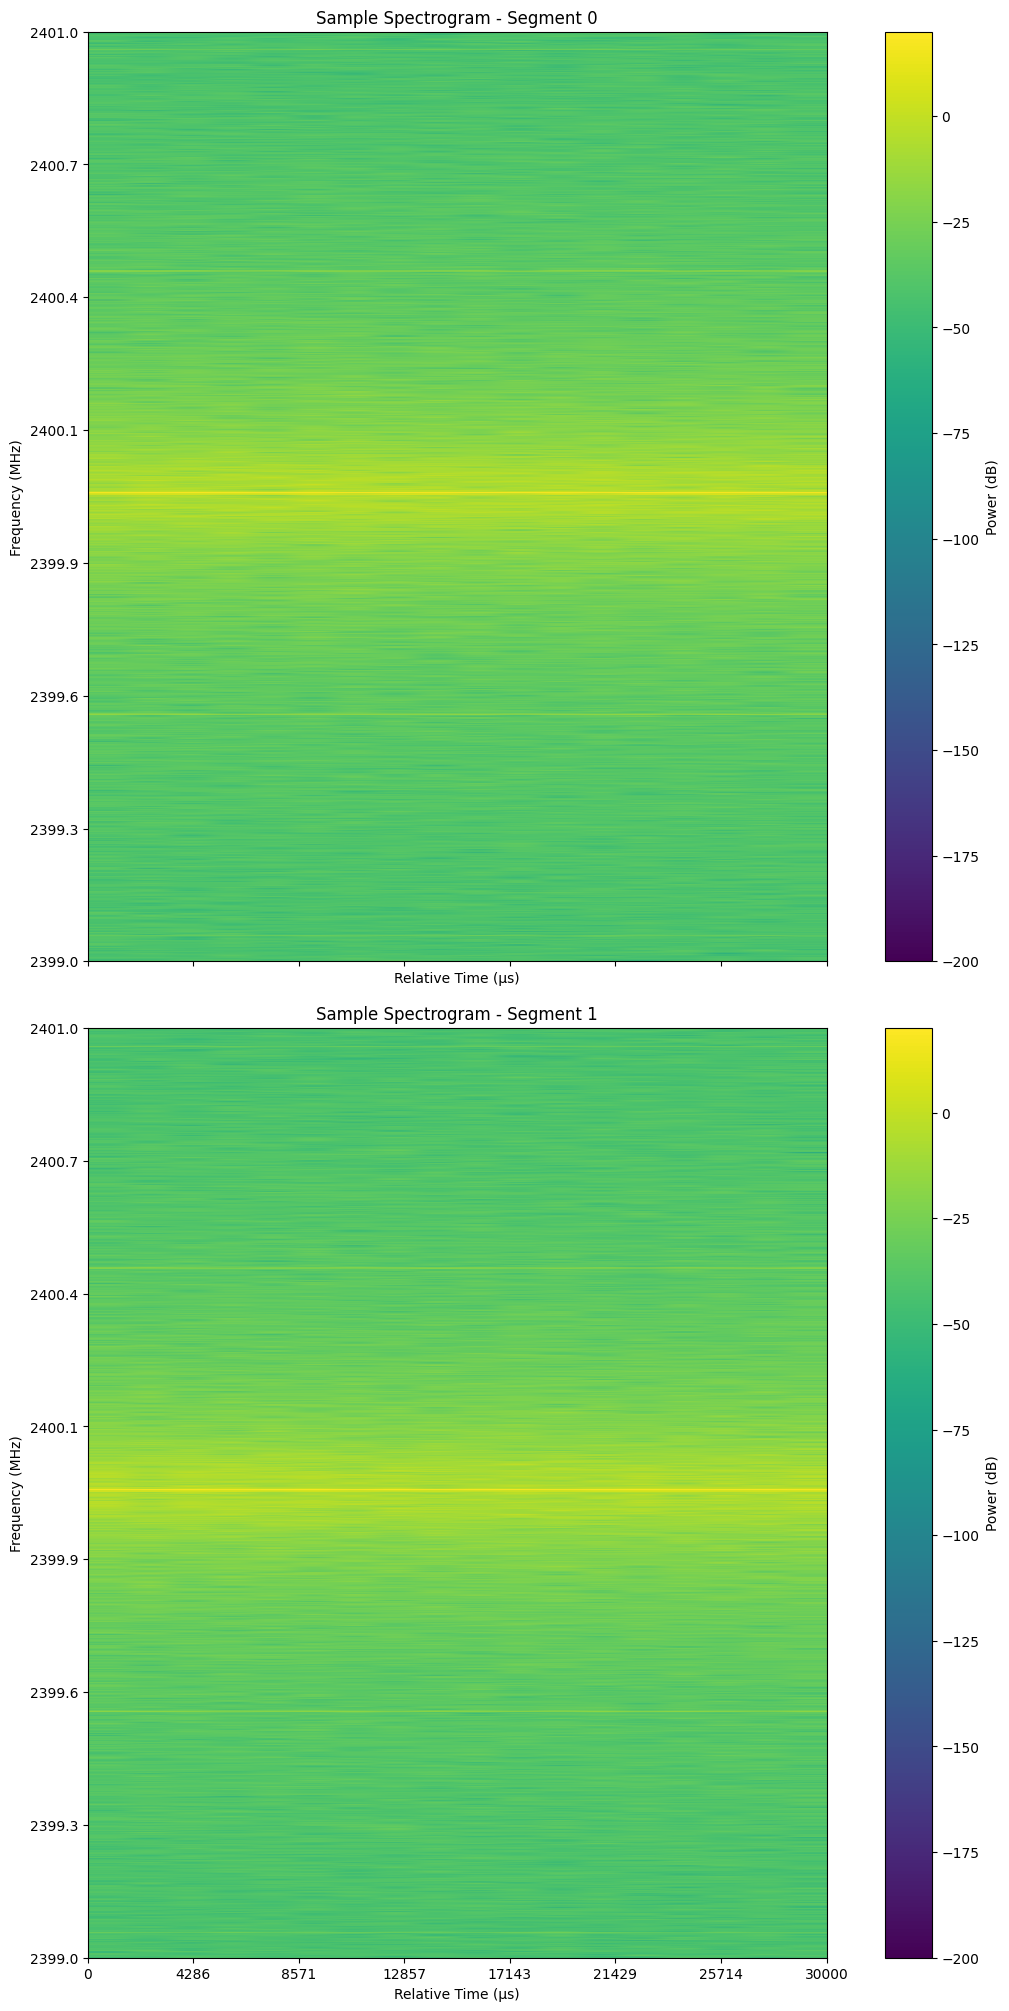

In [10]:

# Initialize a figure.
fig, axes = plt.subplots(len(sigmf_recordings), 1, figsize = (10, 20), sharex = "col", constrained_layout = True)

# Generate spectrograms.
for i in range(0, len(sigmf_recordings)):
    if isinstance(axes, Axes):
        recording_axes = axes
    else:
        recording_axes = axes[i]
    plot_spectrogram_on_axis(recording_axes, sigmf_recordings[i], start_time, end_time, min_freq, max_freq, min_power, max_power, time_unit="us", freq_unit="MHz",
                             show_xlabel=True, show_ylabel=True, show_colorbar=True, show_title=True, title=plot_titles[i])


plt.show()